#Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a X-day low, buy.
    3. If the SPY closes at a X-day high, sell your long position.
    
    (optimize for number of days)

In [1]:
%matplotlib inline

Use future imports for python 3.0 forward compatibility

In [2]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

Other imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# set size of inline plots
matplotlib.rcParams['figure.figsize'] = [14, 10]

Some global data

In [4]:
#symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2005, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [5]:
periods = range(2, 16)
periods = [str(period) for period in periods]

Run Strategy

In [6]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].stats()

2 3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,2.10,4.63,4.45,4.04,3.10,6.92,7.75,5.36,1.27,-0.35,0.24,0.10,-1.38,0.65
max_closed_out_drawdown,-35.27,-34.84,-26.82,-24.61,-24.68,-20.59,-28.35,-45.01,-50.21,-48.06,-48.23,-46.35,-60.35,-58.86
drawdown_annualized_return,-16.82,-7.53,-6.03,-6.09,-7.96,-2.98,-3.66,-8.40,-39.39,138.83,-201.88,-459.17,43.69,-90.36
drawdown_recovery,-2.69,-2.80,-2.72,-0.90,-1.48,-1.48,-3.78,-3.85,-3.54,-3.52,-3.52,-3.52,-3.52,-3.52
best_month,22.44,31.87,23.72,25.66,25.65,21.97,21.98,21.98,21.97,21.98,21.97,22.56,22.36,22.30
worst_month,-14.28,-20.05,-17.68,-17.71,-17.68,-17.70,-17.71,-24.36,-24.37,-24.36,-24.36,-24.37,-24.38,-24.34
sharpe_ratio,0.21,0.34,0.33,0.31,0.26,0.48,0.52,0.38,0.16,0.07,0.11,0.10,0.02,0.13
sortino_ratio,0.15,0.26,0.25,0.23,0.18,0.34,0.37,0.27,0.12,0.05,0.08,0.07,0.01,0.10
monthly_std,4.72,5.11,4.54,4.27,4.00,3.78,3.97,4.13,4.39,4.29,4.23,4.13,4.36,4.45
pct_time_in_market,33.95,28.80,27.70,25.77,23.49,22.94,22.25,23.40,25.61,24.93,25.15,24.05,26.62,26.82


Bar graphs

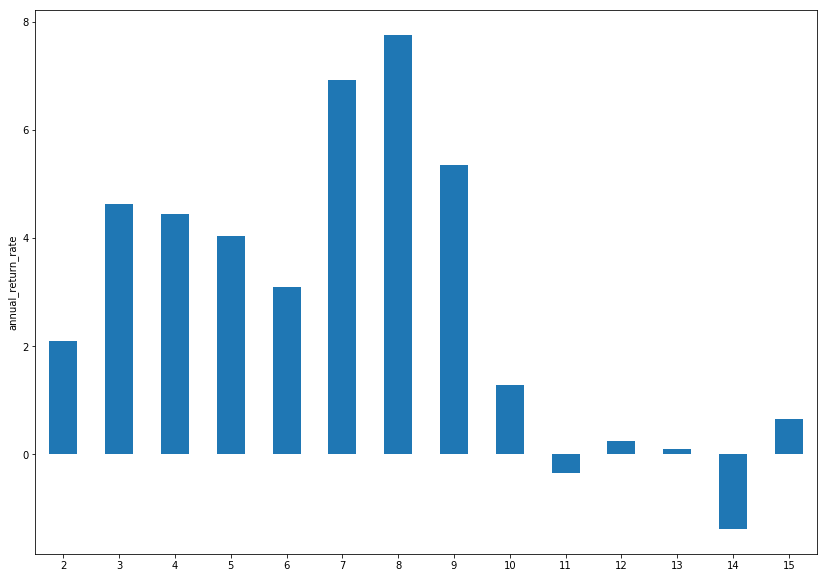

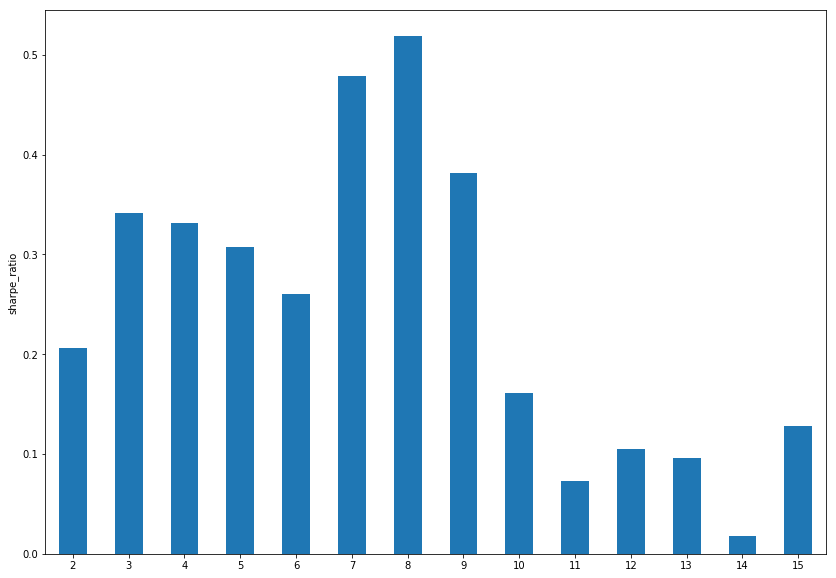

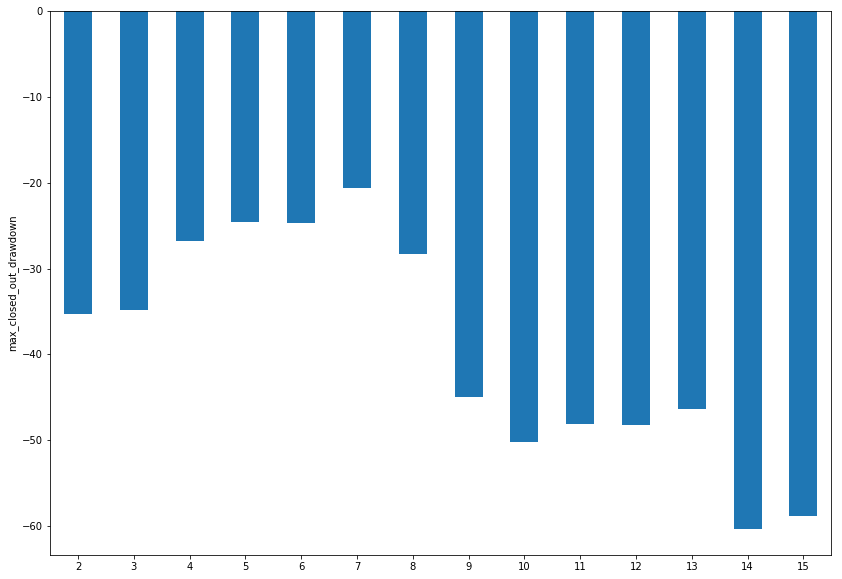

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

2007-03-08 00:00:00 BUY  282 GDX @ 35.41
2019-05-15 00:00:00 SELL 282 GDX @ 20.79


Equity curve

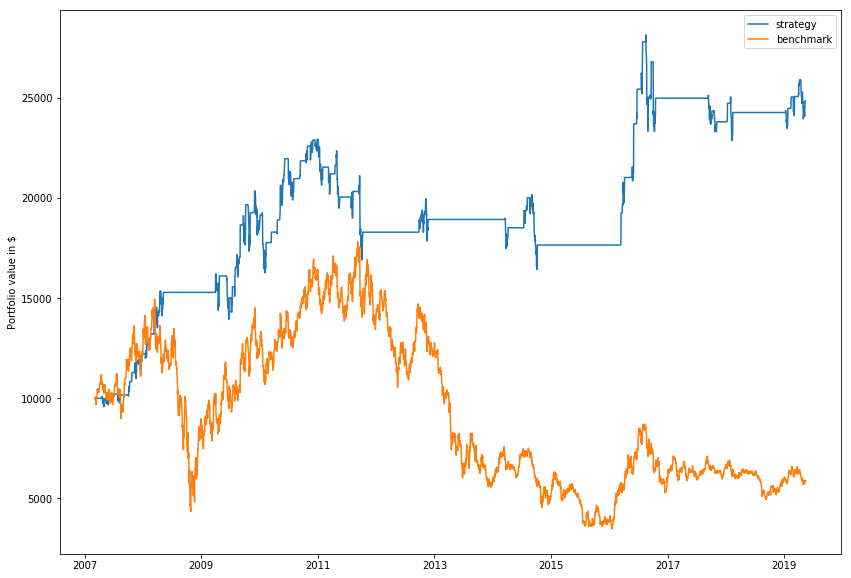

In [10]:
pf.plot_equity_curve(strategies['8'].dbal, benchmark=benchmark.dbal)